In [242]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
years = ["2020-21", "2021-22", "2022-23"]

nba_csv_files = [
    "wizards.csv",
    "warriors.csv",
    "timberwolves.csv",
    "thunder.csv",
    "suns.csv",
    "spurs.csv",
    "rockets.csv",
    "raptors.csv",
    "pistons.csv",
    "pelicans.csv",
    "pacers.csv",
    "nuggets.csv",
    "nets.csv",
    "mavs.csv",
    "magic.csv",
    "lakers.csv",
    "knicks.csv",
    "kings.csv",
    "jazz.csv",
    "hornets.csv",
    "heat.csv",
    "hawks.csv",
    "grizzlies.csv",
    "clippers.csv",
    "celtics.csv",
    "cavs.csv",
    "bulls.csv",
    "bucks.csv",
    "blazers.csv",
    "76ers.csv",
]


file_to_tm = {
    "wizards.csv": "WAS",
    "warriors.csv": "GSW",
    "timberwolves.csv": "MIN",
    "thunder.csv": "OKC",
    "suns.csv": "PHO",
    "spurs.csv": "SAS",
    "rockets.csv": "HOU",
    "raptors.csv": "TOR",
    "pistons.csv": "DET",
    "pelicans.csv": "NOP",
    "pacers.csv": "IND",
    "nuggets.csv": "DEN",
    "nets.csv": "BRK",
    "mavs.csv": "DAL",
    "magic.csv": "ORL",
    "lakers.csv": "LAL",
    "knicks.csv": "NYK",
    "kings.csv": "SAC",
    "jazz.csv": "UTA",
    "hornets.csv": "CHO",
    "heat.csv": "MIA",
    "hawks.csv": "ATL",
    "grizzlies.csv": "MEM",
    "clippers.csv": "LAC",
    "celtics.csv": "BOS",
    "cavs.csv": "CLE",
    "bulls.csv": "CHI",
    "bucks.csv": "MIL",
    "blazers.csv": "POR",
    "76ers.csv": "PHI",
}

# assert every file has a mapping
assert set(nba_csv_files) <= set(file_to_tm)

# Max sure we have all 30 teams 
assert len(nba_csv_files) == 30

In [ ]:
# Only need name, pos, mp, OBPM, DBPM, VORP, Player-additional
def process_columns(df:pd.DataFrame, team:str, year:int) -> pd.DataFrame:
    
    # Drop any columns we dont need
    df = df.drop(columns=['Rk', 'Age', 'G', 'GS', 'PER', 'TS%', '3PAr',
                          'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
                          'OWS', 'DWS', 'WS', 'WS/48', 'BPM', 'Awards'], axis=1)

    # add team and year to df
    df["Team"] = team
    df["Year"] = year 

    return df 



In [ ]:

tmp_df = pd.DataFrame() 

# File path
#  
# Dirty
# |
# |-----
# | 2020-21
# |      |
# |     Data.csv
# |      .
# |      .
# -----
# |  2021-21
# |      |
# .      Data
# .      . 
# .      .
# .

for year in years: 
    for team in nba_csv_files:
        
        # Create file path to csv file
        file_path = ("dirty/" + str(year) + "/" + team)
        
        # 1. Read -> 2. Clean -> 3. Store
        df = pd.read_csv(file_path)
        df = process_columns(df, file_to_tm[team], int('20' + year.split("-")[1]))
        df.to_csv("clean/" + str(year) + "/" + str(team), index=False)

        # Add onto running table of data 
        tmp_df = pd.concat([tmp_df, df])
       

# Store complete advanced data set
tmp_df = tmp_df[["Player", "Player-additional", "Team", "MP", "OBPM", "DBPM", "VORP", "Pos", "Year"]]
tmp_df.to_csv("clean/nba_advanced_data.csv", index=False)

df = tmp_df
df.sort_values("Player")


,Player,Player-additional,Team,MP,OBPM,DBPM,VORP,Pos,year
13,A.J. Green,greenaj01,MIL,345,-0.3,-0.6,0.1,SG,2023
18,A.J. Lawson,lawsoaj01,DAL,106,-1.5,-3.1,-0.1,SG,2023
19,A.J. Lawson,lawsoaj01,MIN,2,-2.3,7.5,0.0,SG,2023
7,AJ Griffin,griffaj01,ATL,1401,-0.3,-0.5,0.4,SF,2023
1,Aaron Gordon,gordoaa01,DEN,2376,0.5,-1.1,0.9,PF,2022
...,...,...,...,...,...,...,...,...,...
12,Ziaire Williams,willizi02,MEM,561,-4.7,-0.8,-0.5,SF,2023
7,Ziaire Williams,willizi02,MEM,1346,-2.4,-0.6,-0.3,SF,2022
2,Zion Williamson,willizi01,NOP,2026,6.1,-0.3,4.0,PF,2021
9,Zion Williamson,willizi01,NOP,956,4.8,1.0,1.9,PF,2023


In [246]:
df[["Player", "Player-additional"]].to_csv("names_advanced_tmp.csv", index=False)

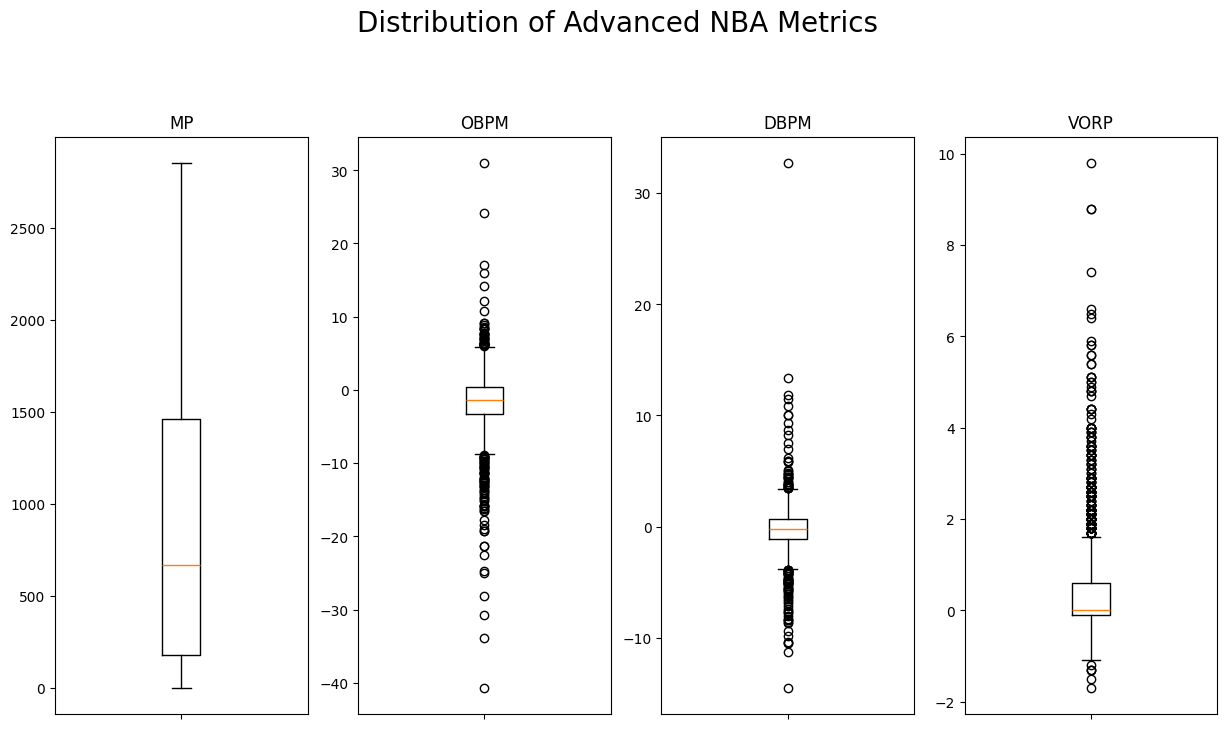

In [247]:
fig, ax = plt.subplots(1, 4, figsize=(15, 7.5), sharey=False)

cols = ["MP", "OBPM", "DBPM", "VORP"]

for j, col in enumerate(cols):
    ax[j].boxplot(df[col].dropna())
    ax[j].set_title(col)
    ax[j].tick_params(axis="x", labelbottom=False)

fig.suptitle("Distribution of Advanced NBA Metrics", fontsize=20, y=1.05)
plt.show()

In [248]:
df_salary = pd.read_csv("clean/nba_salaries_2021_to_2025.csv")
df_salary.sort_values(["Player", "Year"])

,Player,Player-additional,Tm,Salary,Year
58,Aaron Gordon,gordoaa01,DEN,18136364,2021
544,Aaron Gordon,gordoaa01,DEN,16409091,2022
1025,Aaron Gordon,gordoaa01,DEN,19690909,2023
1503,Aaron Gordon,gordoaa01,DEN,22266182,2024
280,Aaron Holiday,holidaa01,IND,2345640,2021
...,...,...,...,...,...
1652,Ziaire Williams,willizi02,MEM,4810200,2024
113,Zion Williamson,willizi01,NOP,10245480,2021
583,Zion Williamson,willizi01,NOP,10733400,2022
1063,Zion Williamson,willizi01,NOP,13534817,2023


In [ ]:
df_combined = df.merge(
    df_salary.drop(columns=["Tm"]),
    on=["Player", "Player-additional", "Year"],
    how="left"
)

df_combined[["Player", "Player-additional", "Team", "MP", "OBPM", "DBPM", "VORP", "Pos","Salary", "Year"]]
df_combined.sort_values(["Player", "Year"])

,Player,Player-additional,Team,MP,OBPM,DBPM,VORP,Pos,year,Salary
1897,A.J. Green,greenaj01,MIL,345,-0.3,-0.6,0.1,SG,2023,NaN
1401,A.J. Lawson,lawsoaj01,MIN,2,-2.3,7.5,0.0,SG,2023,NaN
1622,A.J. Lawson,lawsoaj01,DAL,106,-1.5,-3.1,-0.1,SG,2023,NaN
1777,AJ Griffin,griffaj01,ATL,1401,-0.3,-0.5,0.4,SF,2023,NaN
235,Aaron Gordon,gordoaa01,DEN,648,-0.1,-0.3,0.3,PF,2021,18136364.0
...,...,...,...,...,...,...,...,...,...,...
1147,Ziaire Williams,willizi02,MEM,1346,-2.4,-0.6,-0.3,SF,2022,4373040.0
1802,Ziaire Williams,willizi02,MEM,561,-4.7,-0.8,-0.5,SF,2023,4591680.0
187,Zion Williamson,willizi01,NOP,2026,6.1,-0.3,4.0,PF,2021,10245480.0
1533,Zion Williamson,willizi01,NOP,956,4.8,1.0,1.9,PF,2023,13534817.0


In [ ]:
df_combined = df_combined.dropna()
df_combined.sort_values(["Player", "Year"])

,Player,Player-additional,Team,MP,OBPM,DBPM,VORP,Pos,year,Salary
235,Aaron Gordon,gordoaa01,DEN,648,-0.1,-0.3,0.3,PF,2021,18136364.0
304,Aaron Gordon,gordoaa01,ORL,736,0.5,0.1,0.5,PF,2021,18136364.0
883,Aaron Gordon,gordoaa01,DEN,2376,0.5,-1.1,0.9,PF,2022,16409091.0
1565,Aaron Gordon,gordoaa01,DEN,2055,2.4,-0.3,2.1,PF,2023,19690909.0
212,Aaron Holiday,holidaa01,IND,1176,-3.3,-0.9,-0.7,PG,2021,2345640.0
...,...,...,...,...,...,...,...,...,...,...
1571,Zeke Nnaji,nnajize01,DEN,728,-2.7,-0.9,-0.3,PF,2023,2498760.0
1147,Ziaire Williams,willizi02,MEM,1346,-2.4,-0.6,-0.3,SF,2022,4373040.0
1802,Ziaire Williams,willizi02,MEM,561,-4.7,-0.8,-0.5,SF,2023,4591680.0
187,Zion Williamson,willizi01,NOP,2026,6.1,-0.3,4.0,PF,2021,10245480.0


In [ ]:
# Aaron Gordon played for two teams in 2021, so im going to drop the team in which he played the least at
df_one_team = (
    df_combined
    .sort_values(["Player-additional", "Year", "MP"], ascending=[True, True, False])
    .drop_duplicates(subset=["Player-additional", "year"], keep="first")
    .reset_index(drop=True)
)

df_one_team.sort_values(["Player", "Year"])

,Player,Player-additional,Team,MP,OBPM,DBPM,VORP,Pos,year,Salary
444,Aaron Gordon,gordoaa01,ORL,736,0.5,0.1,0.5,PF,2021,18136364.0
445,Aaron Gordon,gordoaa01,DEN,2376,0.5,-1.1,0.9,PF,2022,16409091.0
446,Aaron Gordon,gordoaa01,DEN,2055,2.4,-0.3,2.1,PF,2023,19690909.0
550,Aaron Holiday,holidaa01,IND,1176,-3.3,-0.9,-0.7,PG,2021,2345640.0
551,Aaron Holiday,holidaa01,WAS,663,-2.4,0.3,0.0,PG,2022,3980551.0
...,...,...,...,...,...,...,...,...,...,...
919,Zeke Nnaji,nnajize01,DEN,728,-2.7,-0.9,-0.3,PF,2023,2498760.0
1321,Ziaire Williams,willizi02,MEM,1346,-2.4,-0.6,-0.3,SF,2022,4373040.0
1322,Ziaire Williams,willizi02,MEM,561,-4.7,-0.8,-0.5,SF,2023,4591680.0
1319,Zion Williamson,willizi01,NOP,2026,6.1,-0.3,4.0,PF,2021,10245480.0


In [252]:
df = df_one_team.copy()

In [253]:
df 

,Player,Player-additional,Team,MP,OBPM,DBPM,VORP,Pos,year,Salary
0,Precious Achiuwa,achiupr01,MIA,737,-3.6,-0.5,-0.4,PF,2021,2582160.0
1,Precious Achiuwa,achiupr01,TOR,1725,-2.0,-0.6,-0.2,C,2022,2711280.0
2,Precious Achiuwa,achiupr01,TOR,1140,-1.4,-0.8,-0.1,C,2023,2840160.0
3,Jaylen Adams,adamsja01,MIL,18,-15.1,-4.6,-0.1,PG,2021,1416852.0
4,Steven Adams,adamsst01,NOP,1605,-0.4,0.1,0.7,C,2021,29592696.0
...,...,...,...,...,...,...,...,...,...,...
1348,Cody Zeller,zelleco01,CHO,1005,-0.2,-0.2,0.4,C,2021,15415730.0
1349,Cody Zeller,zelleco01,MIA,217,-2.0,-0.7,0.0,C,2023,517060.0
1350,Ivica Zubac,zubaciv01,LAC,1609,0.6,0.4,1.2,C,2021,7000000.0
1351,Ivica Zubac,zubaciv01,LAC,1852,-0.1,0.8,1.3,C,2022,7518518.0
